In [405]:
"""
This notebook plots the positions of TF-MoDISco profile motifs relative to the TSS.
We mostly use this to identify the locations of DPR motifs (Fig. 6B).
"""

'\nThis notebook plots the positions of TF-MoDISco profile motifs relative to the TSS.\nWe mostly use this to identify the locations of DPR motifs (Fig. 6B).\n'

In [406]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from pathlib import Path
import pyranges
from tangermeme.io import extract_loci
import tqdm

In [408]:
# PRINT COMMANDS TO DOWNLOAD AND EXTRACT DATA

# Set scratch to where you want to download data to
SCRATCH = "/Users/adamhe/github/scratch"

URL = "https://zenodo.org/records/10597358/files"
TAR = "tfmodisco_results.tar.gz"
print(f"wget {URL}/{TAR} -P {SCRATCH}")
print(f"tar -xvzf {SCRATCH}/{TAR} -C {SCRATCH}")
print(f"wget merged_pl.bw, merged_mn.bw -P {SCRATCH}")

wget https://zenodo.org/records/10597358/files/tfmodisco_results.tar.gz -P /Users/adamhe/github/scratch
tar -xvzf /Users/adamhe/github/scratch/tfmodisco_results.tar.gz -C /Users/adamhe/github/scratch
wget merged_pl.bw, merged_mn.bw -P /Users/adamhe/github/scratch


In [409]:
# LOAD DATA

# Read in windows around PRO-cap peaks in LCLs
all_bed = pd.read_csv(
    Path(SCRATCH, "tfmodisco_results/merged_windows_all.bed.gz"), sep="\t", header=None, names=["chrom", "start", "end"]
)
# Load the experimental data:
signals = pd.read_csv(Path(SCRATCH, "all_tss_windows_procap_mean.csv.gz"), header=None, index_col=0).to_numpy()
signals = signals[:, np.r_[250:750, 1250:1750]]

FileNotFoundError: [Errno 2] No such file or directory: '/Users/adamhe/github/scratch/all_tss_windows_procap_mean.csv.gz'

In [389]:
# Load the motif calls
all_motifs = pd.read_csv(
    Path(SCRATCH, "quantity_annotated_seqlets_full_cleaned.bed.gz"),
    sep="\t", header=None, names=["chrom", "start", "end", "example_idx", "attr", "seqlet_p", "motif", "motif_p", "sequence"]
)

In [390]:
{
    prefix: len(all_motifs[all_motifs.motif.str.startswith(prefix)])
    for prefix in [motif.split("-")[0] for motif in all_motifs.motif.unique()]
}

{'ETS': 178061,
 'SP/KLF': 148873,
 'NFY': 17793,
 'NRF1': 54866,
 'YY1': 15891,
 'CREB': 20224,
 'CA': 29290,
 'IRF': 37179,
 'CTCF': 20255,
 'TFEC': 9279,
 'THAP': 8725,
 'TBP': 8854,
 'ZBTB33': 7738,
 'POU': 3811,
 'ZNF76': 2696,
 'NFKB2': 2039}

In [381]:
tss = signals.argmax(axis=1)
is_mn = tss >= 500
tss_df = pd.DataFrame(
    {
        "tss": tss,
        "is_mn": is_mn,
    }
)
# Subtract 1000 from tss if is_mn
tss_df["tss"] = tss_df["tss"].apply(lambda x: x - 500 if x >= 500 else x) + 250

In [403]:
# Get motif frequency

motif_name = "IRF"
hits = all_motifs[all_motifs["motif"].str.startswith(motif_name)]
motif_positions = []
for i, hit in tqdm.tqdm(hits.iterrows()):
    peak_idx = hit["example_idx"]
    tss_coord = tss_df["tss"].iloc[peak_idx] + all_bed.iloc[peak_idx]["start"]
    motif_center = (hit["end"] + hit["start"]) // 2
    tss_strand = tss_df["is_mn"].iloc[peak_idx]
    motif_positions.append(tss_coord - motif_center if tss_strand else motif_center - tss_coord)

37179it [00:01, 22824.24it/s]


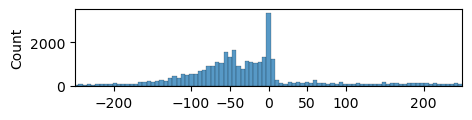

In [404]:
# Set xticks
xticks = [-200, -100, -50, 0, 50, 100, 200]

plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 10000
#sns.kdeplot(motif_positions, bw_adjust=0.5)
sns.histplot(motif_positions, bins=200)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
#plt.savefig("img_profile_modisco_position/CA_Inr_kde.pdf", bbox_inches="tight")

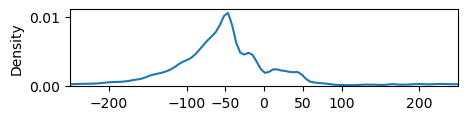

In [243]:
# Set xticks
xticks = [-200, -100, -50, 0, 50, 100, 200]

plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 10000
sns.kdeplot(motif_positions, bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
#plt.savefig("img_profile_modisco_position/CA_Inr_kde.pdf", bbox_inches="tight")

NameError: name 'pos' is not defined

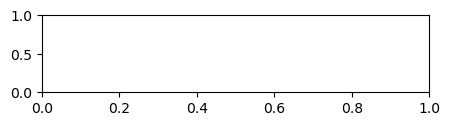

In [214]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 1000
i = 1
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/SP_kde.pdf", bbox_inches="tight")

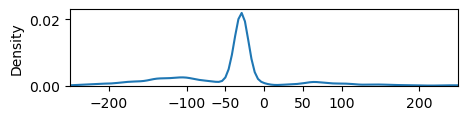

In [14]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 2000
i = 2
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/TATA_kde.pdf", bbox_inches="tight")

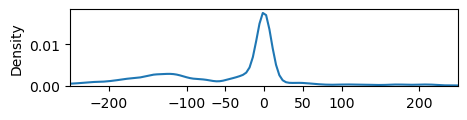

In [16]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 2000
i = 3
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/TA_Inr_kde.pdf", bbox_inches="tight")

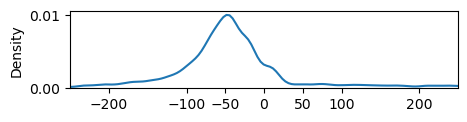

In [17]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 500
i = 4
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/ETS_kde.pdf", bbox_inches="tight")

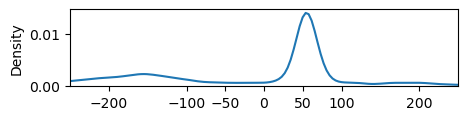

In [18]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 2000
i = 5
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/DPR5_kde.pdf", bbox_inches="tight")

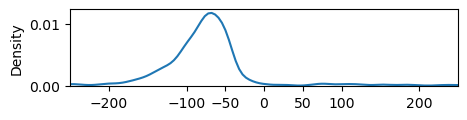

In [19]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 500
i = 6
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/NFY_kde.pdf", bbox_inches="tight")

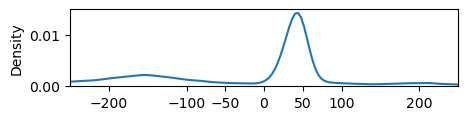

In [20]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 500
i = 7
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/DPR7_kde.pdf", bbox_inches="tight")

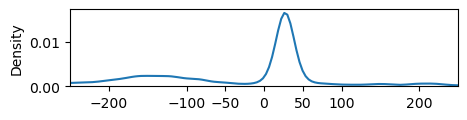

In [21]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 1000
i = 8
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/DPR8_kde.pdf", bbox_inches="tight")

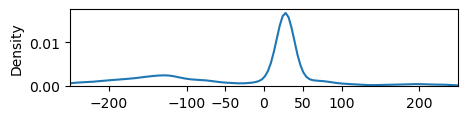

In [22]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 1000
i = 9
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/DPR9_kde.pdf", bbox_inches="tight")

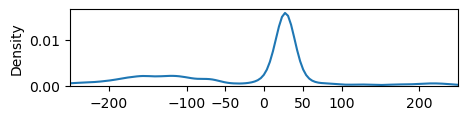

In [24]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 1000
i = 10
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/DPR10_kde.pdf", bbox_inches="tight")

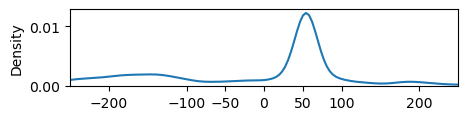

In [25]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 500
i = 11
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/DPR11_kde.pdf", bbox_inches="tight")

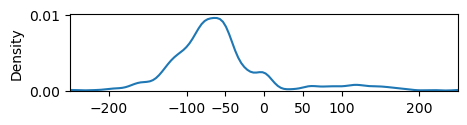

In [26]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 100
i = 12
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/IRF_kde.pdf", bbox_inches="tight")

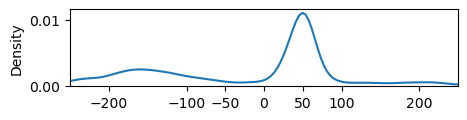

In [27]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 250
i = 13
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/DPR13_kde.pdf", bbox_inches="tight")

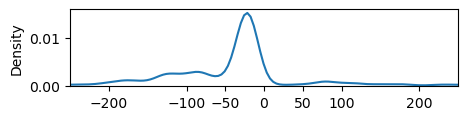

In [28]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 200
i = 14
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/TATA14_kde.pdf", bbox_inches="tight")

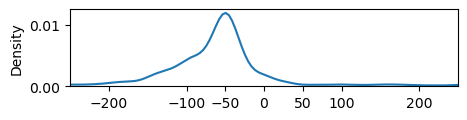

In [29]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 200
i = 15
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/CREB_kde.pdf", bbox_inches="tight")

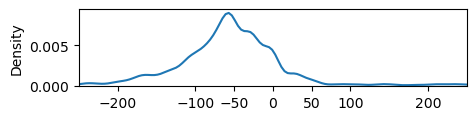

In [30]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 100
i = 16
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/NRF1_kde.pdf", bbox_inches="tight")

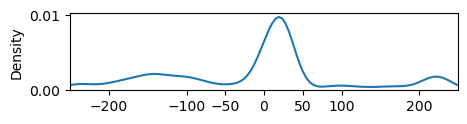

In [31]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 200
i = 17
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/YY1_kde.pdf", bbox_inches="tight")

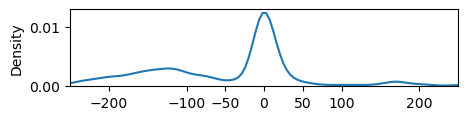

In [32]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 500
i = 18
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/TGT_Inr_kde.pdf", bbox_inches="tight")

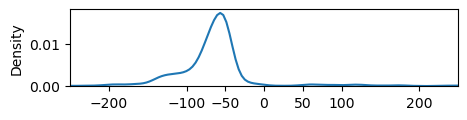

In [33]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 200
i = 20
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/POU2F3_kde.pdf", bbox_inches="tight")

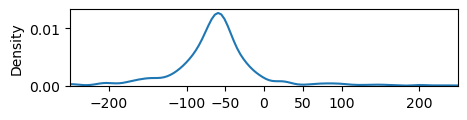

In [34]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 100
i = 21
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/TFEC_kde.pdf", bbox_inches="tight")

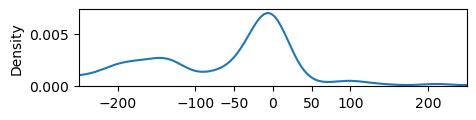

In [35]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 25
i = 38
sns.kdeplot(pos[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/TCT_kde.pdf", bbox_inches="tight")

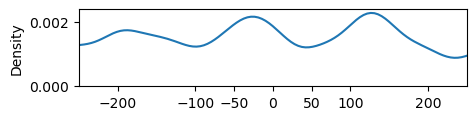

In [37]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 25
i = 0
sns.kdeplot(neg[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/neg_ETS_kde.pdf", bbox_inches="tight")

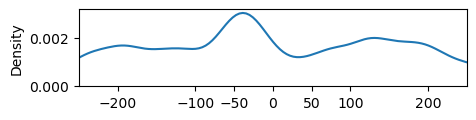

In [38]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 50
i = 1
sns.kdeplot(neg[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/neg_SP_kde.pdf", bbox_inches="tight")

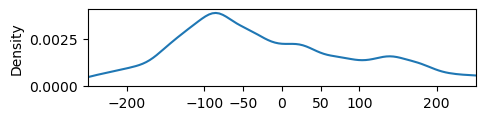

In [39]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 50
i = 3
sns.kdeplot(neg[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/neg_YY1_kde.pdf", bbox_inches="tight")

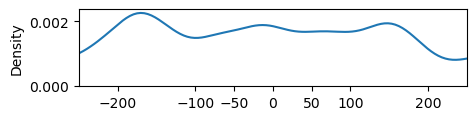

In [40]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 20
i = 4
sns.kdeplot(neg[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/neg_NRF1_kde.pdf", bbox_inches="tight")

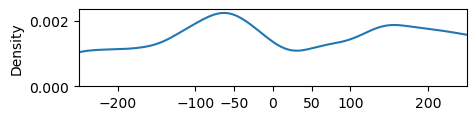

In [41]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 20
i = 7
sns.kdeplot(neg[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/neg_NFY_kde.pdf", bbox_inches="tight")

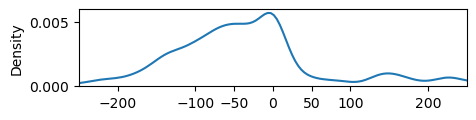

In [42]:
plt.rcParams["figure.figsize"] = 5,1
fig, (ax) = plt.subplots(nrows = 1, sharex = True)

# 20
i = 15
sns.kdeplot(neg[str(i)][:], bw_adjust=0.5)
ax.set_xlim(-250, 250)
ax.set_xticks(xticks)
plt.savefig("img_profile_modisco_position/neg_CA_Inr_kde.pdf", bbox_inches="tight")